<a href="https://colab.research.google.com/github/yugawala/shakyo/blob/main/%E3%82%B9%E3%83%A9%E3%82%B9%E3%83%A9%E3%82%8F%E3%81%8B%E3%82%8B%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E8%AB%96%E5%86%99%E7%B5%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5章

In [18]:
import pymc as pm
import arviz as az

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

import japanize_matplotlib

In [2]:
df = sns.load_dataset('iris')
display(df.head())
df['species'].value_counts()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x16e86a9d0>,
 [Text(4.0, 0, '4.0'),
  Text(4.2, 0, '4.2'),
  Text(4.4, 0, '4.4'),
  Text(4.6000000000000005, 0, '4.6'),
  Text(4.800000000000001, 0, '4.8'),
  Text(5.000000000000001, 0, '5.0'),
  Text(5.200000000000001, 0, '5.2'),
  Text(5.400000000000001, 0, '5.4'),
  Text(5.600000000000001, 0, '5.6'),
  Text(5.800000000000002, 0, '5.8'),
  Text(6.000000000000002, 0, '6.0')])

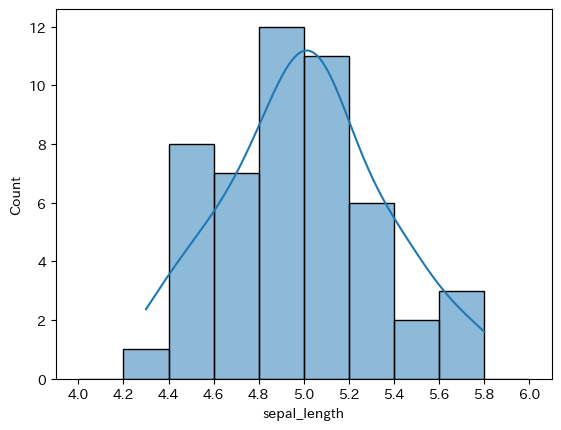

In [7]:
df1 = df[df['species'] == 'setosa']

bins = np.arange(4.0, 6.2, 0.2)

sns.histplot(df1['sepal_length'], bins=bins, kde=True)
plt.xticks(bins)

In [4]:
s1 = df1['sepal_length']
X = s1.values
print(s1.describe())
print(X)

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


In [8]:
model1 = pm.Model()

with model1:
  mu = pm.Normal('mu', mu=0, sigma=10)
  sigma = pm.HalfNormal('sigma', sigma=10)
  X_obs = pm.Normal('X_obs', mu=mu, sigma=sigma, observed=X)

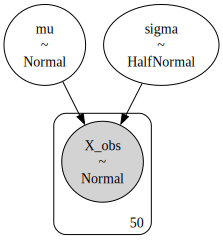

In [10]:
g = pm.model_to_graphviz(model1)
display(g)

In [11]:
with model1:
  idata1 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


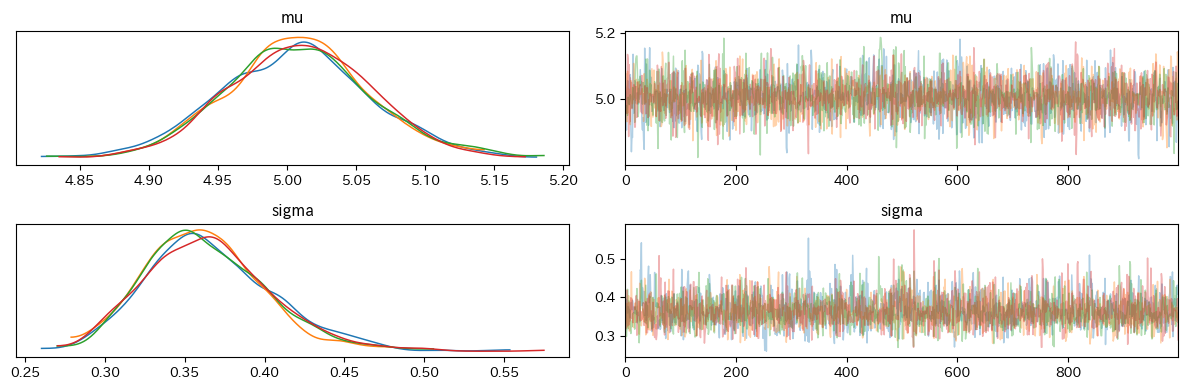

In [13]:
az.plot_trace(idata1, compact=False)
plt.tight_layout()

array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

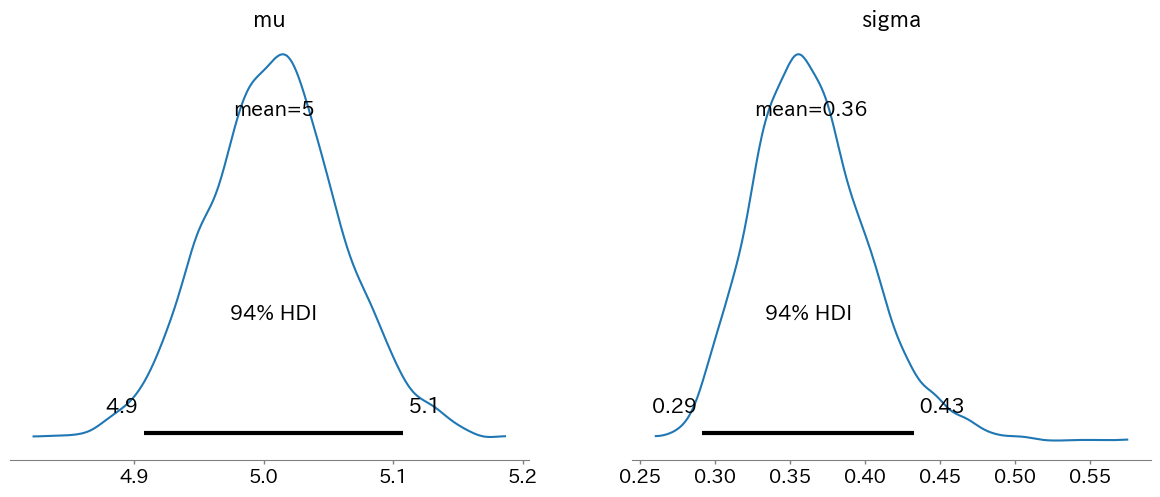

In [14]:
az.plot_posterior(idata1)

In [15]:
summary1 = az.summary(idata1)
display(summary1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,5.008,0.053,4.907,5.108,0.001,0.001,3963.0,2164.0,1.0
sigma,0.364,0.039,0.291,0.433,0.001,0.000,3525.0,2781.0,1.0


In [16]:
mu_mean1 = summary1.loc['mu', 'mean']
sigma_mean1 = summary1.loc['sigma', 'mean']
print(mu_mean1, sigma_mean1)

5.008 0.364


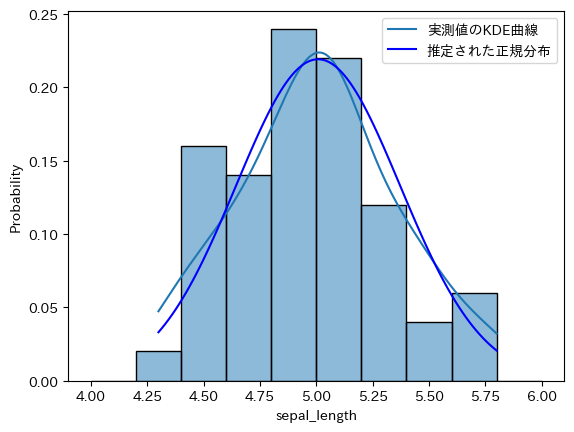

In [28]:
_, ax = plt.subplots()
sns.histplot(df1['sepal_length'], bins=bins, kde=True, ax=ax, stat='probability')
ax.get_lines()[0].set_label("実測値のKDE曲線")

# mu_mean1とsigma_mean1に従い、df1['sepal_length']のminとmaxがminとmaxである正規分布を描画
x = np.linspace(df1['sepal_length'].min(), df1['sepal_length'].max(), 100)
y = stats.norm.pdf(x, mu_mean1, sigma_mean1)
plt.plot(x, y*0.2, c='b', label="推定された正規分布")
plt.legend()

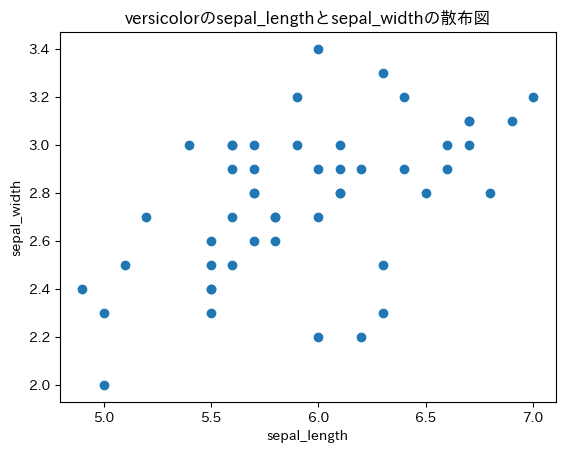

In [29]:
df1 = df[df['species'] == 'versicolor']

X = df1['sepal_length'].values
Y = df1['sepal_width'].values

plt.title('versicolorのsepal_lengthとsepal_widthの散布図')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(X, Y)


In [30]:
model1 = pm.Model()

with model1:
  alpha = pm.Normal('alpha', mu=0, sigma=10)
  beta = pm.Normal('beta', mu=0, sigma=10)

  mu = alpha * X + beta

  epsilon = pm.HalfNormal('epsilon', sigma=10)

  Y_obs = pm.Normal('Y_obs', mu=mu, sigma=epsilon, observed=Y)

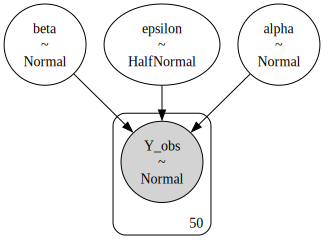

In [31]:
g = pm.model_to_graphviz(model1)
display(g)